In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [104]:
#AUX functions
def proliferate(item, times):
    return [item for i in range(times)]
def flatten_df(input_df):
    flat_dir = dict()
    for name, row in input_df.iterrows():
        flat_dir.setdefault('Accumulated sampling (ns)', list()).extend(list(row.keys()))
        flat_dir.setdefault('Density per frame', list()).extend(list(row.values))
        cluster, sampling_method, replica = (proliferate(item, len(row.values)) for item in name.split('-'))
        flat_dir.setdefault('Cluster', list()).extend(cluster)
        flat_dir.setdefault('Sampling Method', list()).extend(sampling_method)
        flat_dir.setdefault('Replica', list()).extend(replica)
    return pd.DataFrame(flat_dir)
def row_plot_convergence(probe_names, data_frames):
    fig, ax = plt.subplots(1,len(probe_names), figsize=(15,5),  sharex=True)
    for i, data in enumerate(data_frames):
        sns.lineplot(y='Density per frame', x='Accumulated sampling (ns)', hue='Cluster', data=data, ax=ax[i])
        ax[i].set_title(probe_names[i])
    sns.despine()

# SOCS1 AlphaFold2

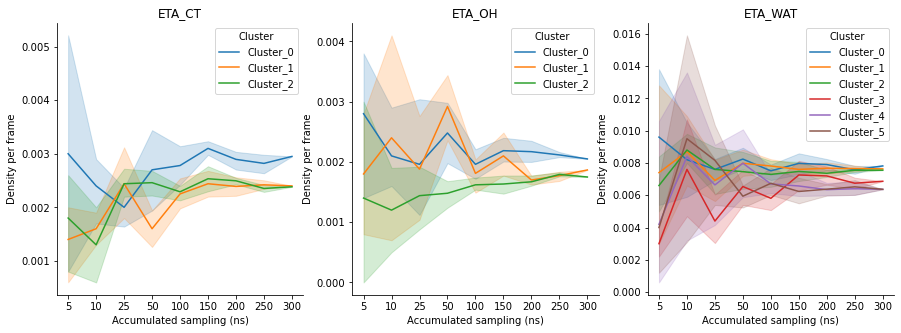

In [101]:
file_template = '../outputs/SOCS1_AF/SOCS1_AF_{probe}.csv'
probes = ['ETA_CT', 'ETA_OH', 'ETA_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

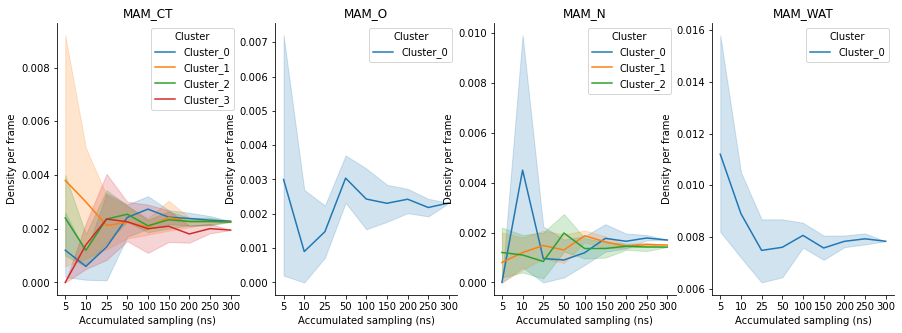

In [102]:
file_template = '../outputs/SOCS1_AF/SOCS1_AF_{probe}.csv'
probes = ['MAM_CT','MAM_O', 'MAM_N', 'MAM_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

# p62-ZZ-6KHZ

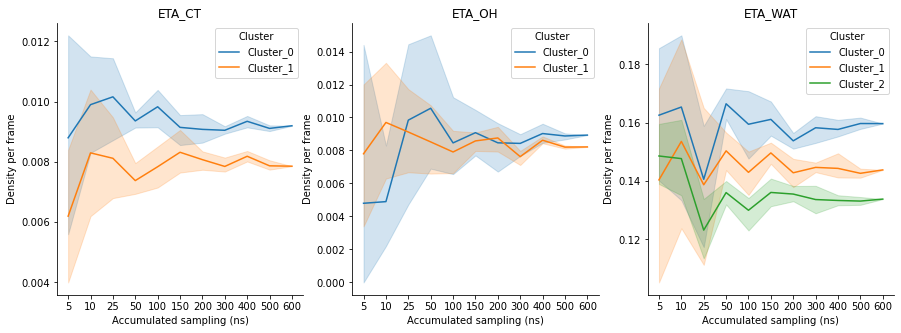

In [105]:
file_template = '../outputs/p62-ZZ_6KHZ/p62-ZZ_6KHZ_{probe}.csv'
probes = ['ETA_CT', 'ETA_OH', 'ETA_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)

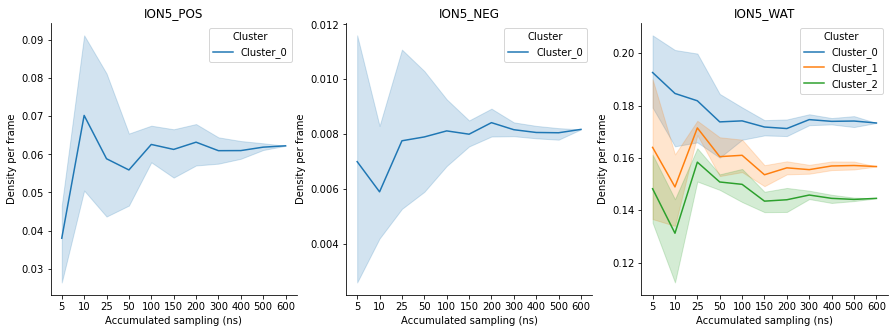

In [106]:
file_template = '../outputs/p62-ZZ_6KHZ/p62-ZZ_6KHZ_{probe}.csv'
probes = ['ION5_POS', 'ION5_NEG', 'ION5_WAT']
data_frames = [flatten_df(pd.read_csv(file_template.format(probe = probe), index_col=0)) for probe in probes]
row_plot_convergence(probes, data_frames)